# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.


## The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# The steps followed in this notebook are summarized as follows:

1. Reading, understanding and visualizing the data
2. Preparing the data for modeling (train-test split, rescaling etc.)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on test data set
6. Checking the assumptions of Linear regression algorithm
7. Interpretation of the results

# 1. Reading, understanding and visualizing the data

### Importing Libraries

In [1219]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')




### Read the CSV file

In [1258]:
bike = pd.read_csv('day.csv')

# View the sample records from the file
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the data

In [1137]:
#Shape of the data

bike.shape

#730 rows and 16 columns in total

(730, 16)

In [1138]:
#Datatypes of each column - inspecting the numerical and categorical data types
#Understanding more about the fields and data types

bike.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1139]:
#Describe function will give us summary of all the numerical columns in the dataset

bike.describe() 

# No evident outliers are visible

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### There are no outliers, hence no outlier treatment is required for this dataset

In [1140]:
# Checking the missing values

bike.isnull().sum()



instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### No missing values treatment is required in this dataset

## Derived columns

We have year, month, weekday columns already available in the dataset. We will be dropping dteday but before doing that let's derive quarter and day of the month attributes from it.

In [1149]:
print(type(bike['dteday']))

bike['dteday']= pd.to_datetime(bike['dteday']) 

bike['quarter'] = bike['dteday'].dt.quarter
bike[['dteday','quarter']].head()

<class 'pandas.core.series.Series'>


,dteday,quarter
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,2
4,2018-05-01,2


In [1150]:
bike['dayofthemonth'] = bike['dteday'].dt.day
bike[['dteday','dayofthemonth']].head()

,dteday,dayofthemonth
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,1
4,2018-05-01,1


In [1151]:
# To predict the cnt variable, we do not need Instant, casual or registered

#instant- unique row identifier, doesn't yield anything in the prediction
#casual and registered- we have to predict the total count, thus these two segments are not needed

#dteday is removed as we have some of date features like mnth and year and weekday already in other columns and 
#also for this analysis we will not consider day to day trend in demand for bikes


bike.drop(columns=['instant','casual','registered','dteday'],axis=1, inplace=True)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quarter,dayofthemonth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2,1


In [1152]:
# Mapping the seemingly ordered variables to their string values for better understanding- season, mnth, weekday, weathersit

bike['season']= bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})



#Convery categorical data into category type
#bike['season']=bike['season'].astype('category')
#bike['weathersit']=bike['weathersit'].astype('category')
#bike['mnth']=bike['mnth'].astype('category')
#bike['weekday']=bike['weekday'].astype('category')

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   atemp          730 non-null    float64
 9   hum            730 non-null    float64
 10  windspeed      730 non-null    float64
 11  cnt            730 non-null    int64  
 12  quarter        730 non-null    int64  
 13  dayofthemonth  730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [1153]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quarter,dayofthemonth
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,1
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2,1
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,2114,4,27
726,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,3095,4,28
727,spring,1,Dec,0,Sat,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,1341,4,29
728,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,4,30


In [1154]:
# EDA- Exploratory data analyis

#Separating continous and categorical variables

bike.nunique().sort_values()

yr                 2
holiday            2
workingday         2
weathersit         3
season             4
quarter            4
weekday            7
mnth              12
dayofthemonth     31
temp             498
hum              594
windspeed        649
atemp            689
cnt              695
dtype: int64

## EDA - Exploratory Data Analyis

### Pairplot to see the relationship between continous variables

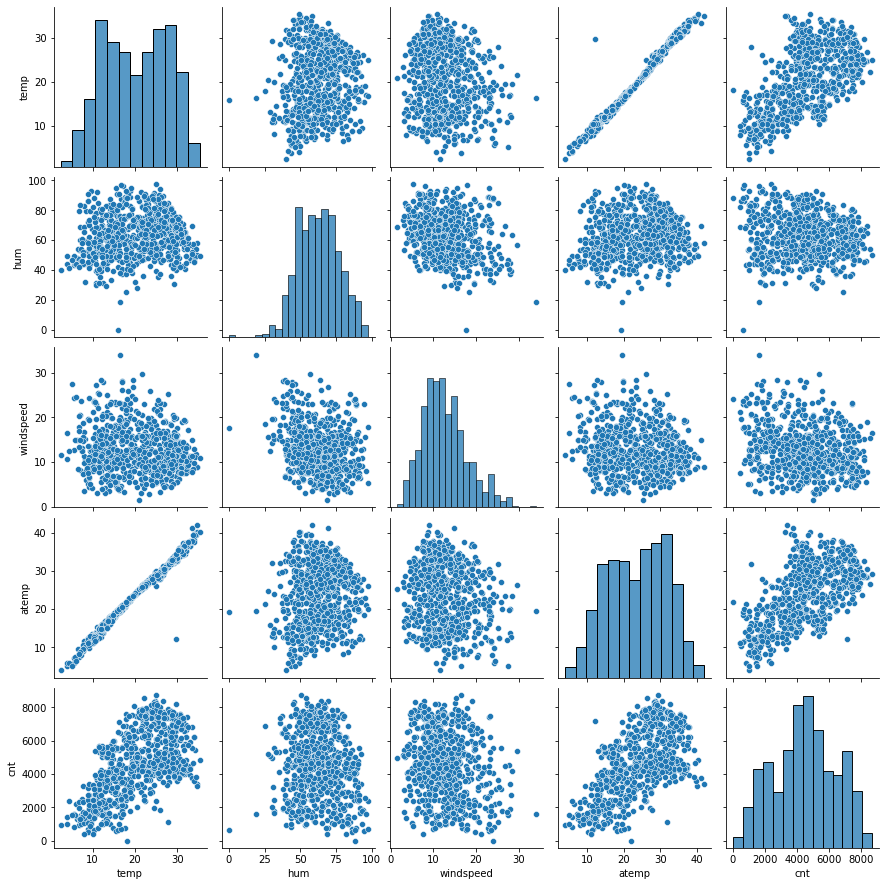

In [1155]:
# yr, holiday,workingday, weathersit, season, weekday, mnth- Categorical variables
# temp, hum, windspeed, atemp - continous variable
#dteday - date variable


# For continous variables, we can plot a pairplot to see the initial relationship between the cnt and the numerical columns


sns.pairplot(bike, vars=['temp', 'hum','windspeed','atemp','cnt'])
plt.show()

## Observations from the pairplot
1. We can see that cnt variable seems to have a proportional relationship with the temp and the atemp variable
2. Bike rentals seem to be more during high humidity
3. Bike rentals seem to be more when the windspeed is less

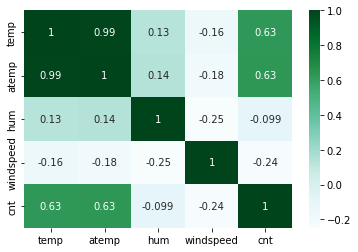

In [1157]:
# Checking continuous variables correlation with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Only temp and atemp seem to be very highly correlated with each other

## Univariate Analyis - Categorical variables

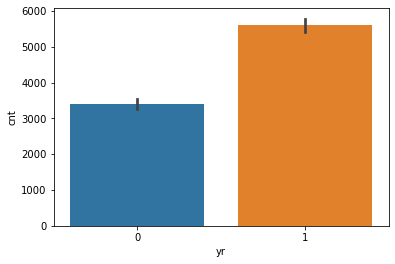

In [1043]:
#fig, ax1 = plt.subplots(figsize=(12, 8))
#ax1.set_title('Annual Income vs Chargedoff Proportion')

ax1=sns.barplot(x='yr', y='cnt', data=bike)
plt.show()

#### Year vs cnt : Bike rentals are more in 2019 as compared to 2018

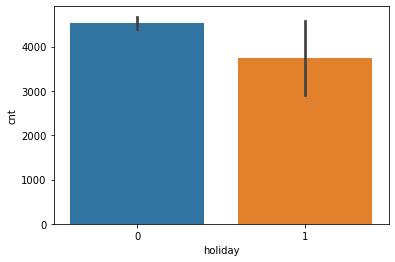

In [1044]:
ax1=sns.barplot(x='holiday', y='cnt', data=bike)

plt.show()

#### Holidays vs cnt: Bike rentals are less when there is a holiday

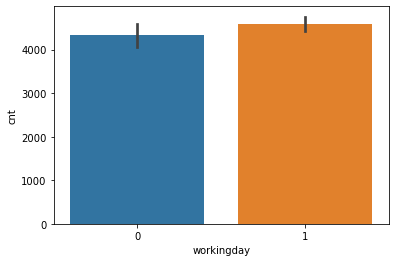

In [1045]:
ax1=sns.barplot(x='workingday', y='cnt', data=bike)

plt.show()

#### Workingday vs cnt: Bike rentals are very slightly more on working days according to the above bar plot

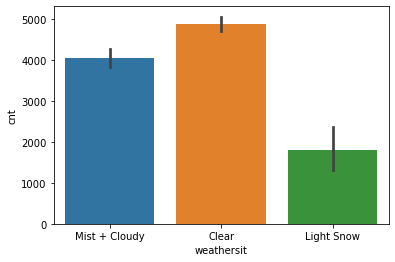

In [1046]:
ax1=sns.barplot(x='weathersit', y='cnt', data=bike)

plt.show()

#### Weathersit vs cnt: Bike rentals are maximum when the weather is clear and the number is decent even when the weather is Misty-Cloudy. The rentals decrease a lot when snowy conditions appear.

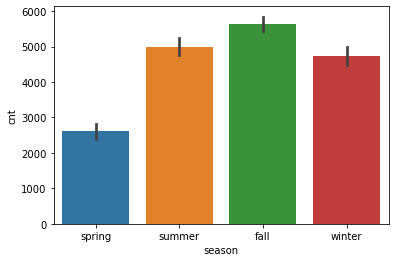

In [1047]:
ax1=sns.barplot(x='season', y='cnt', data=bike)

plt.show()

#### Season vs cnt: Bike rentals are maximum in fall season and have a good number in the summer as well the winter seasons. Spring season causes a drop in bike rentals.

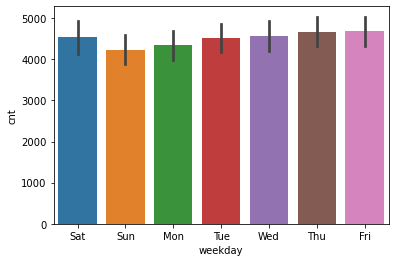

In [1048]:
ax1=sns.barplot(x='weekday', y='cnt', data=bike)

plt.show()

#### Weekday vs cnt: There is no clear trend in bike rentals according to weekdays, demand seems pretty consistent throughout the week.

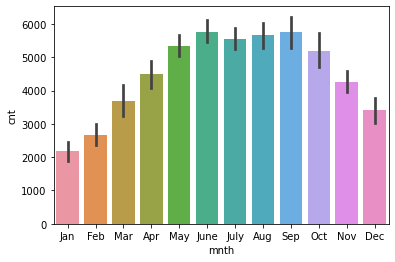

In [1049]:
ax1=sns.barplot(x='mnth', y='cnt', data=bike)

plt.show()

#### Month vs cnt: There is an increasing trend in the number of bike rentals from Jan to May. June is the peak month and demand stays high till Oct and then reduces in Nov-Dec.

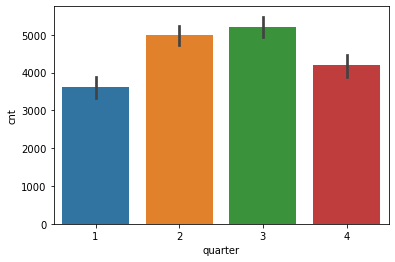

In [1164]:
ax1=sns.barplot(x='quarter', y='cnt', data=bike)

plt.show()

#### Quarter vs cnt: The number of bike rentals are maximum in Q3 followed by Q2.

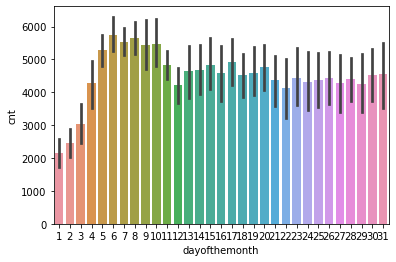

In [1166]:
ax1=sns.barplot(x='dayofthemonth', y='cnt', data=bike)

plt.show()

#### The number of bike rentals are highest during 5th to 12th day of a month.

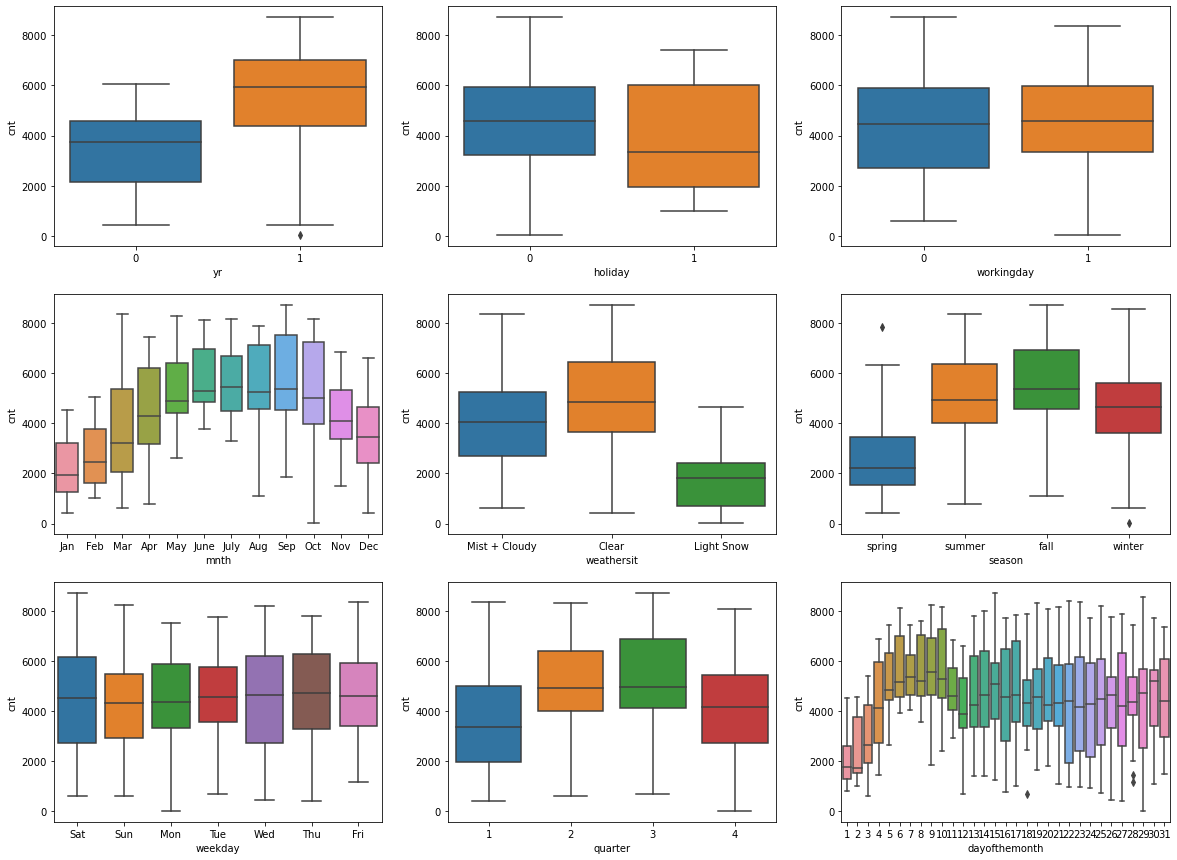

In [1173]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'quarter', y = 'cnt', data = bike)
plt.subplot(3,3,9)
sns.boxplot(x = 'dayofthemonth', y = 'cnt', data = bike)
plt.show()

## Observations:

1. Bike rentals were more in 2019 than 2018
2. Day being a holiday leads to a decrease in bike rentals
3. Bike rentals are increasing from Jan-June, Sep has the max bike rentals and the demand falls after that 
4. Bike rentals are more in clear weather and are least in the snowy conditions
5. Bike rentals are max during Fall, followed closely by summer season
6. Weekday is not leading to a solid conclusion for bike rental behavior
7. Bike rentals are high in number in Q2 and Q3
8. Bike rentals are highest from 5th to 12th of a month


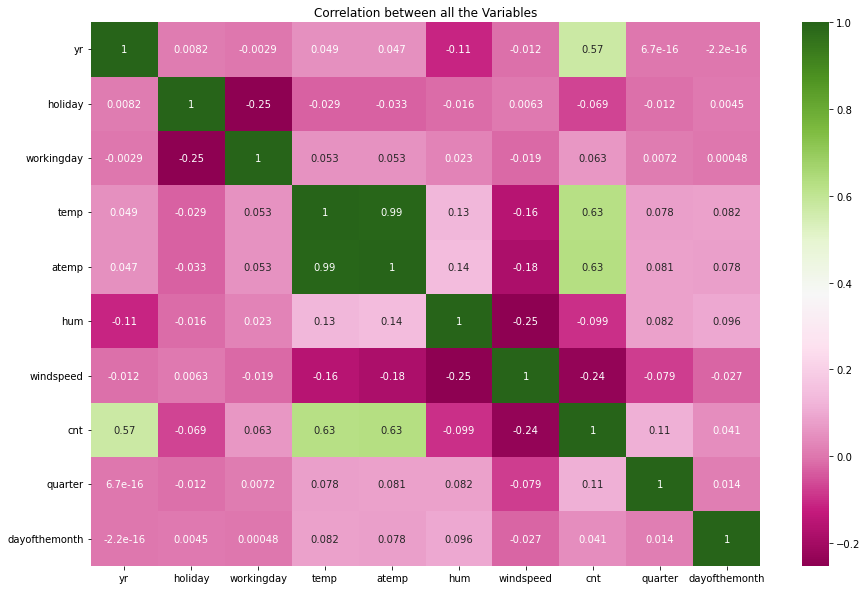

In [1175]:
# Variables like temp and atemp are expected to be highly correlated with each other
# let's check the correlation of all the variables

plt.figure(figsize=(15, 10))
sns.heatmap(bike.corr(), cmap="PiYG", annot = True)
plt.title("Correlation between all the Variables")
plt.show()

#### We can see only one problematic correlation for now, between temp and atemp, the correlation value of 0.99 suggests that we should keep any one of them

In [1176]:
# atemps is how the temprature feels like and it is a derived variable friom the temp variable only, thus dropping atemp
bike.drop(columns=['atemp'],axis=1, inplace=True)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,quarter,dayofthemonth
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,1
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,2,1
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,2,1


In [1177]:
# Data prepration for Linear Regression

# create dummy variables for all the categorical variables


bike_df = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"], drop_first=True)

bike_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   cnt                       730 non-null    int64  
 7   quarter                   730 non-null    int64  
 8   dayofthemonth             730 non-null    int64  
 9   season_spring             730 non-null    uint8  
 10  season_summer             730 non-null    uint8  
 11  season_winter             730 non-null    uint8  
 12  mnth_Aug                  730 non-null    uint8  
 13  mnth_Dec                  730 non-null    uint8  
 14  mnth_Feb  

In [1178]:
bike_df.shape

(730, 31)

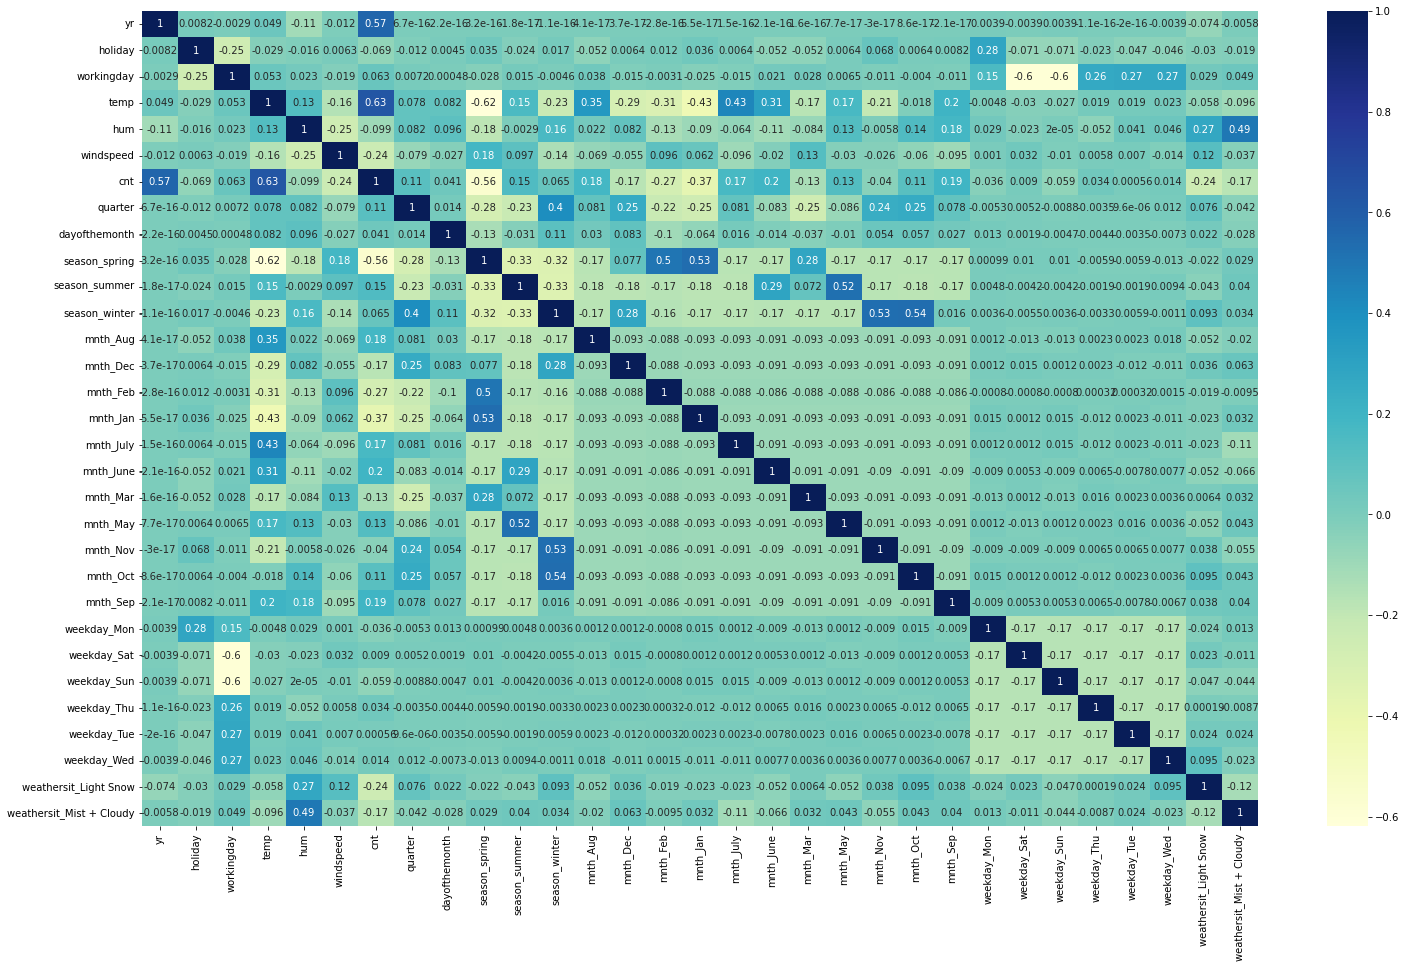

In [1179]:
#Checking the correlation again between variables
plt.figure(figsize=(25, 15))
sns.heatmap(bike_df.corr(), cmap='YlGnBu', annot = True)
plt.show()

### We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals

## Univariate Analysis- Continous variables

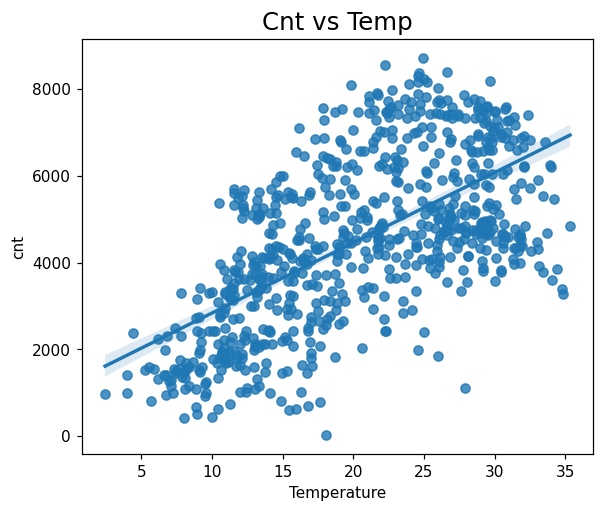

In [1181]:
# Let's examine the relationship between the continous variables and the target variable

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Temperature is positively correlated to the bike rentals

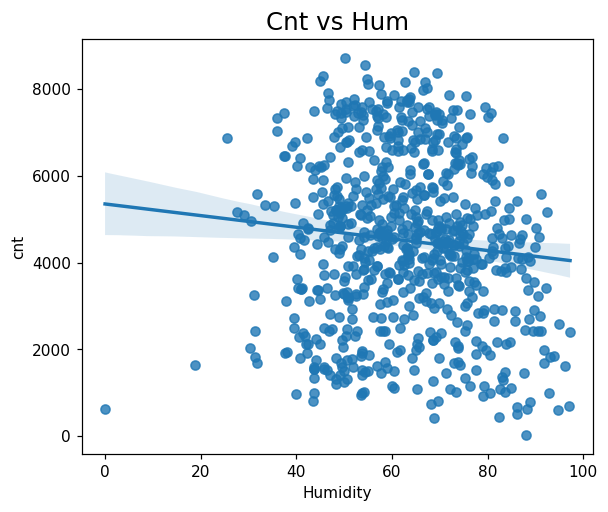

In [1182]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()



#### Not a very strong relationship but increase in humidity leads to a slight decrease in the number of bike rentals

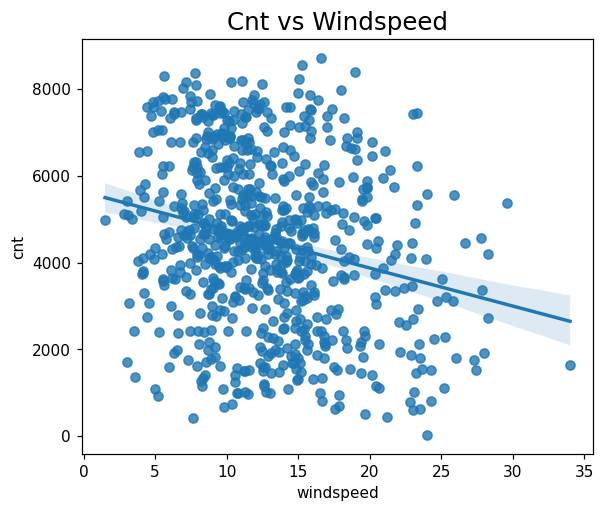

In [1183]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.show()


#### Increase in windspeed leads to a decrease in the number of bike rentals

# 2. Preparing the data for modeling (train-test split, rescaling etc.)

### Splitting the data into train and test sets

In [1184]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 90)

In [1185]:
# Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 31)
(220, 31)


In [1186]:
# Rescaling the features
#import the library
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,quarter,dayofthemonth,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
352,0,0,1,0.271061,0.573022,0.310273,0.388978,4,19,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
528,1,0,1,0.743521,0.502389,0.661526,0.851243,2,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
634,1,0,1,0.736253,0.640998,0.230791,0.848021,3,27,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
220,0,0,1,0.892009,0.487520,0.265382,0.526921,3,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
343,0,0,0,0.268984,0.407328,0.434636,0.364473,4,12,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1187]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,quarter,dayofthemonth,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.498039,0.027451,0.692157,0.543474,0.569962,0.339793,0.515789,2.492157,15.945098,0.250980,0.239216,0.256863,0.080392,0.088235,0.078431,0.094118,0.078431,0.082353,0.080392,0.076471,0.078431,0.096078,0.084314,0.125490,0.143137,0.137255,0.149020,0.162745,0.141176,0.033333,0.345098
std,0.500487,0.163554,0.462054,0.226791,0.180826,0.153844,0.224102,1.136524,8.705447,0.434003,0.427024,0.437332,0.272166,0.283915,0.269113,0.292279,0.269113,0.275172,0.272166,0.266010,0.269113,0.294988,0.278131,0.331599,0.350557,0.344454,0.356457,0.369495,0.348545,0.179682,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.347641,0.428704,0.227244,0.369161,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553070,0.569039,0.322448,0.516107,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741185,0.698752,0.426711,0.677951,4.000000,23.750000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


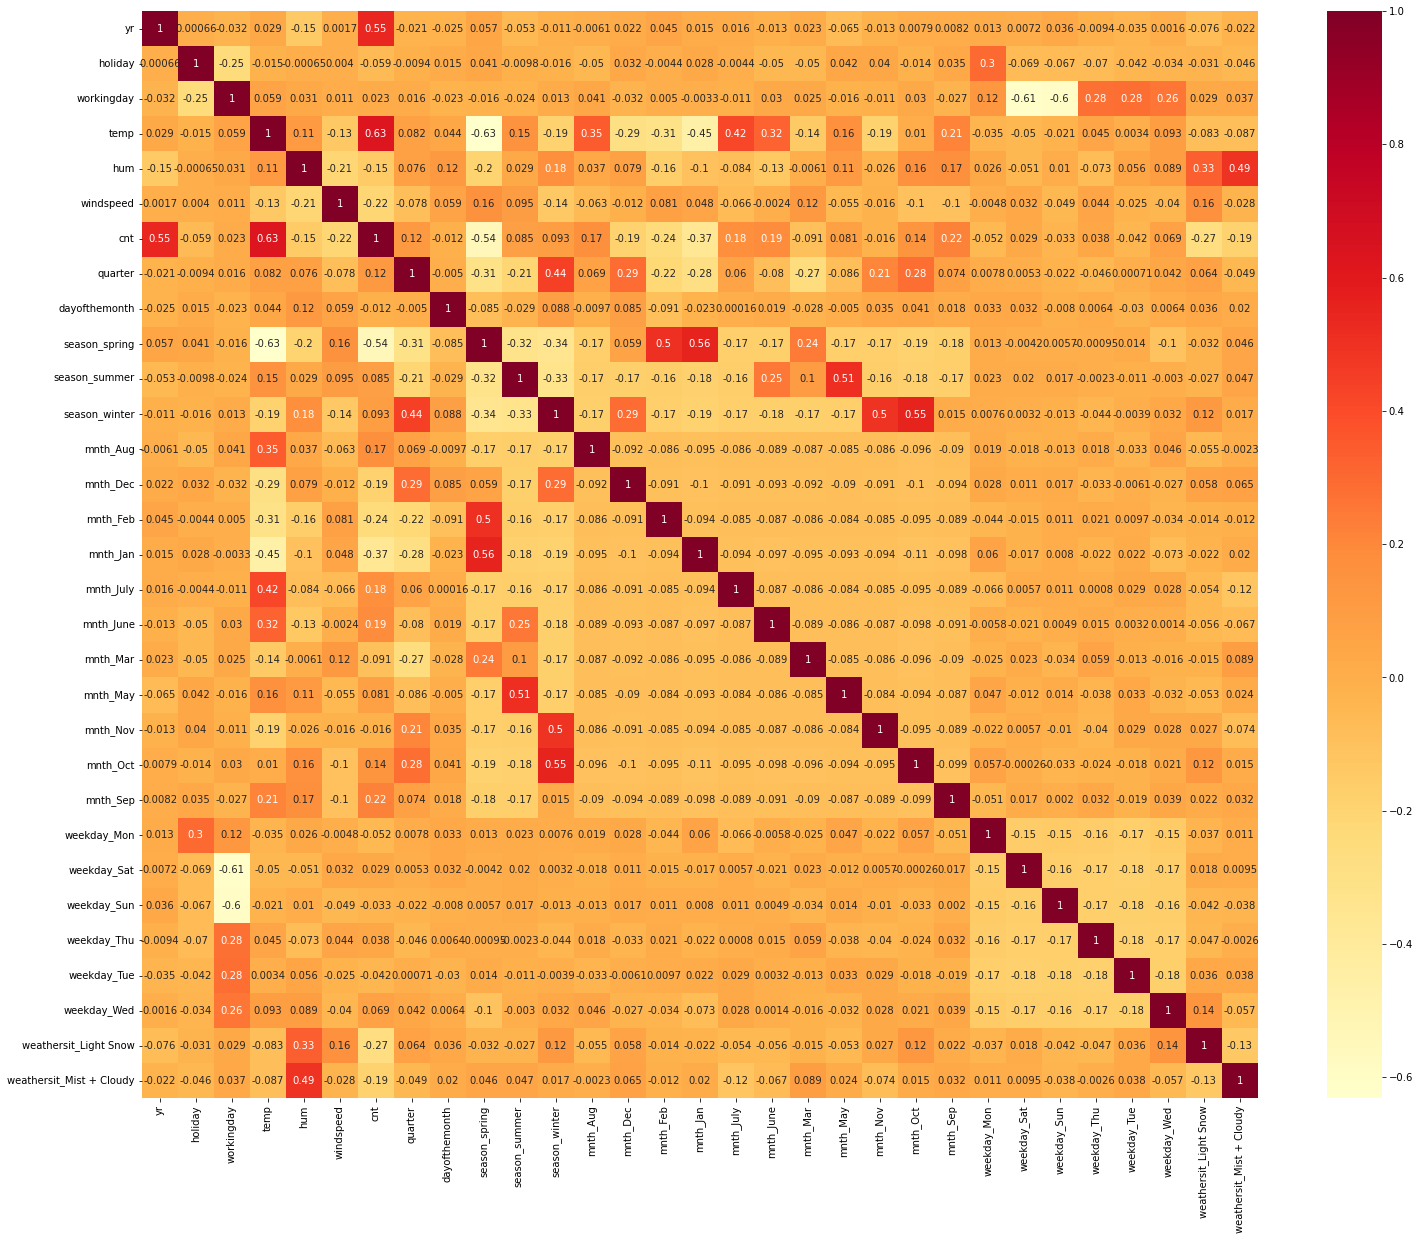

In [1188]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [1189]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

# 3. Training the model

## Using RFE - Recursive Feature Elimination first

In [1190]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1191]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1192]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('quarter', False, 13),
 ('dayofthemonth', False, 16),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 15),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [1193]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [1194]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['holiday', 'quarter', 'dayofthemonth', 'season_summer', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

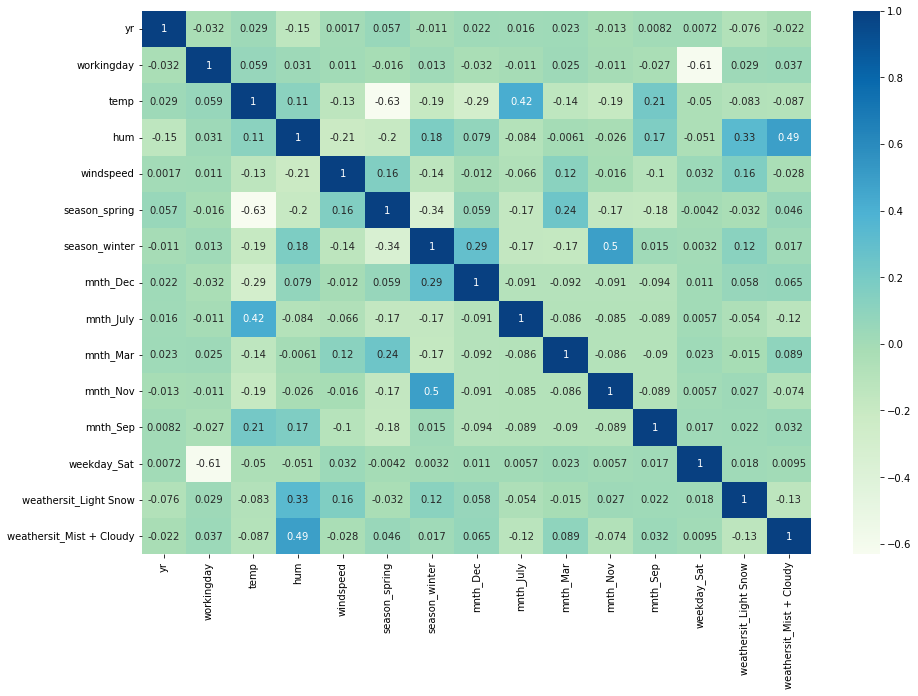

In [1195]:
# Checking correlation of features selected by RFE with target column. 

# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(X_train[['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']].corr(), cmap='GnBu', annot=True)
plt.show()

## No two independent variables have a correlation more than 0.5 suggesting that there is no Multicollinearity in this dataset

# We have 15 top features selected by the RFE, we will now take the step by step approach to reduce the model features further using Statsmodel

In [1197]:
# Now using statsmodel, let's build the model
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

## Model #1

In [1198]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.12e-189
Time:                        17:02:56   Log-Likelihood:                 515.62
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     494   BIC:                            -931.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### All p-values are below 0.05, thus no variable is eligible for elimination basis on p value in this step

In [1200]:
# Checking VIF values

#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.01
2,temp,14.80
4,windspeed,5.48
1,workingday,4.90
6,season_winter,2.68
5,season_spring,2.53
14,weathersit_Mist + Cloudy,2.48
0,yr,2.05
12,weekday_Sat,1.76
10,mnth_Nov,1.66


### In the next step we can drop humidity as its VIF is very high

In [1201]:
X_train_new1 = X_train_rfe.drop(["hum"], axis = 1)

## Model # 2

In [1202]:
# Rebuilding the model without humidity

X_train_lm1 = sm.add_constant(X_train_new1)

lm1 = sm.OLS(y_train,X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.25e-186
Time:                        17:06:14   Log-Likelihood:                 505.69
No. Observations:                 510   AIC:                            -981.4
Df Residuals:                     495   BIC:                            -917.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Acceptable values- drop successful
#### R2 = 84.5% to 83.9%
#### Adj R2 = 84.1% to 83.5%
#### F-Statistic = 180 to 184.6

In [1203]:
# let's look at VIF values again

#Drop the constant term B0

X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,7.36
3,windspeed,5.46
1,workingday,4.87
5,season_winter,2.42
4,season_spring,2.06
0,yr,2.03
11,weekday_Sat,1.75
9,mnth_Nov,1.65
13,weathersit_Mist + Cloudy,1.59
6,mnth_Dec,1.41


## Model #3

In [1204]:
# Dropping windspeed as its VIF is very high

X_train_new2 = X_train_lm1.drop(["windspeed"], axis = 1)

In [1205]:
#Build a model

X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.74e-184
Time:                        17:13:09   Log-Likelihood:                 497.87
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     496   BIC:                            -908.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Acceptable values- drop successful
#### R2 = 83.9% to 83.4%
#### Adj R2 = 83.5% to 83.0%
#### F-Statistic = 184.6 to 192

In [1206]:
# Checking VIF's again


#Drop the constant term B0

X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.64
1,workingday,4.73
4,season_winter,2.42
0,yr,2.03
3,season_spring,1.74
10,weekday_Sat,1.70
8,mnth_Nov,1.62
12,weathersit_Mist + Cloudy,1.59
5,mnth_Dec,1.40
6,mnth_July,1.37


## Model # 4

In [1208]:
# mnth_Mar has a high p value, let's try dropping it

X_train_new3 = X_train_lm2.drop(["mnth_Mar"], axis = 1)

#Build a model

X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.60e-184
Time:                        17:18:48   Log-Likelihood:                 494.96
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     497   BIC:                            -908.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Acceptable values- drop successful
#### R2 = 83.4% to 83.2%
#### Adj R2 = 83.0% to 82.8%
#### F-Statistic = 192 to 205.6

In [1209]:
# Checking the VIF values again


#Drop the constant term B0

X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.63
1,workingday,4.71
4,season_winter,2.41
0,yr,2.03
9,weekday_Sat,1.70
3,season_spring,1.68
7,mnth_Nov,1.61
11,weathersit_Mist + Cloudy,1.57
5,mnth_Dec,1.38
6,mnth_July,1.36


## Model #5

In [1210]:
# We can try dropping workingday as its VIF is very high


X_train_new4 = X_train_lm3.drop(["workingday"], axis = 1)

#Build a model

X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.42e-182
Time:                        17:31:11   Log-Likelihood:                 488.45
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     498   BIC:                            -902.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Acceptable values- drop successful
#### R2 = 83.2% to 82.8%
#### Adj R2 = 82.8% to 82.4%
#### F-Statistic = 205.6 to 217.9

In [1211]:
#Drop the constant term B0

X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.96
3,season_winter,2.33
0,yr,2.03
6,mnth_Nov,1.61
10,weathersit_Mist + Cloudy,1.55
2,season_spring,1.38
4,mnth_Dec,1.38
5,mnth_July,1.35
7,mnth_Sep,1.21
8,weekday_Sat,1.15


## Model#6

In [1213]:
# Dropping weekday_Sat as its p value is high, let's examine the impact

X_train_new6 = X_train_lm5.drop(["weekday_Sat"], axis = 1)

#Build a model

X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.14e-182
Time:                        17:37:54   Log-Likelihood:                 484.50
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     499   BIC:                            -900.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Acceptable values- drop successful
#### R2 = 82.8% to 82.5%
#### Adj R2 = 82.4% to 82.2%
#### F-Statistic = 217.9 to 235.7

In [1215]:
#Drop the constant term B0

X_train_lm7 = X_train_lm6.drop(['const'], axis=1)

# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.90
3,season_winter,2.33
0,yr,2.02
6,mnth_Nov,1.61
9,weathersit_Mist + Cloudy,1.55
4,mnth_Dec,1.38
2,season_spring,1.37
5,mnth_July,1.35
7,mnth_Sep,1.21
8,weathersit_Light Snow,1.07


## Model 6 is our final selected model

1. All the p-values are way below 0.05
2. All the VIF values are below 3
3. Dropping any variable further is leading to a loss in performance
4. The coefficient signs for all the final selevcted independent variables have been same throughout all the iterations


## Final equation from LR

## cnt= 0.2316 + (0.2366 * yr) + (0.4146 * temp) + (-0.1295 * season_spring) + (0.0915 * season_winter) +  (-0.0749 * mnth_Dec) +  (-0.0517 * mnth_July) + (-0.0634 * mnth_Nov) + (0.0523 * mnth_Sep) + (-0.3074 * weathersit_Light Snow) +  (-0.0827 * weathersit_Mist + Cloudy)

# 4. Residual analysis

In [1217]:
# Residual analysis of the Train data
X_train_lm6

,const,yr,temp,season_spring,season_winter,mnth_Dec,mnth_July,mnth_Nov,mnth_Sep,weathersit_Light Snow,weathersit_Mist + Cloudy
352,1.0,0,0.271061,0,1,1,0,0,0,0,0
528,1.0,1,0.743521,0,0,0,0,0,0,0,0
634,1.0,1,0.736253,0,1,0,0,0,1,0,1
220,1.0,0,0.892009,0,0,0,0,0,0,0,0
343,1.0,0,0.268984,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
679,1.0,1,0.450699,0,1,0,0,1,0,0,0
323,1.0,0,0.503656,0,1,0,0,1,0,0,1
671,1.0,1,0.354130,0,1,0,0,1,0,0,1
626,1.0,1,0.614763,0,0,0,0,0,1,0,0


In [1218]:
#y train predicted

y_train_pred = lm6.predict(X_train_lm6)

<Figure size 432x288 with 0 Axes>

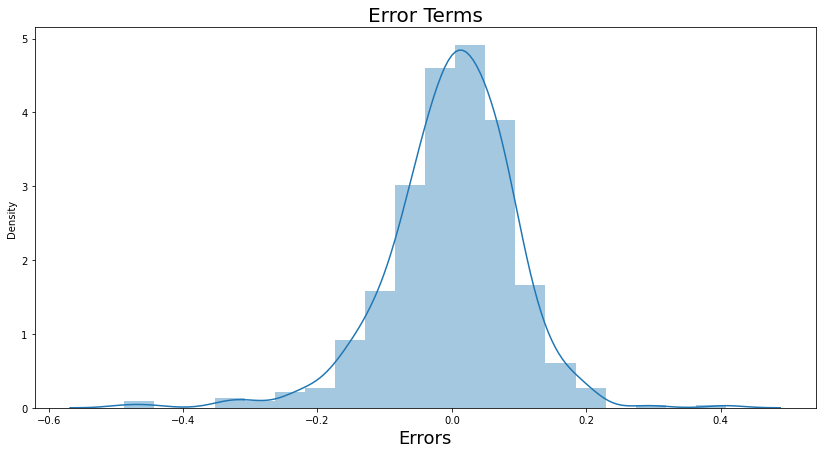

In [1220]:
# Plot the histogram of the error terms
res= y_train - y_train_pred

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((res), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

### Error terms are normally distributed with Mean = 0

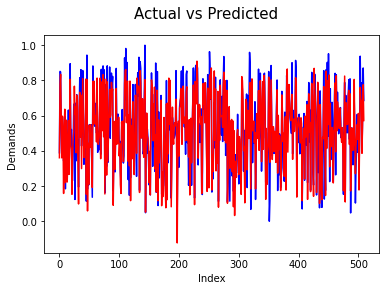

In [1118]:
# Actual vs Predicted for Training dataset

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted results are following almost the same pattern for training set, so this model looks fine

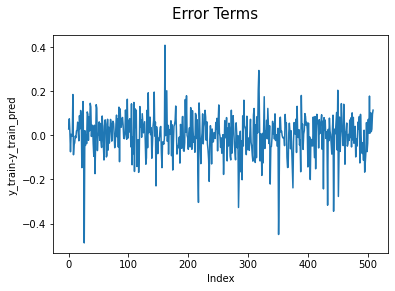

In [1221]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,res)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Error terms are distributed uniformly all across and are independent of each other

In [1120]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

# Same as the model output above

0.8252863448711104

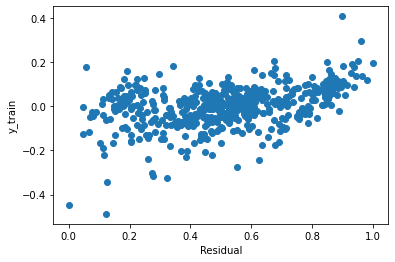

# 5. Predictions and evaluation on test data set

In [1222]:
# Testing the model performance on test dataset
#Create a list of numeric variables

num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,quarter,dayofthemonth,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.031818,0.663636,0.544729,0.538463,0.362273,0.516847,2.550000,15.200000,0.236364,0.281818,0.213636,0.095455,0.077273,0.072727,0.063636,0.100000,0.081818,0.095455,0.104545,0.090909,0.059091,0.077273,0.186364,0.145455,0.159091,0.127273,0.095455,0.140909,0.018182,0.318182
std,0.501120,0.175916,0.473542,0.231757,0.181449,0.172387,0.220038,1.073657,9.021334,0.425817,0.450911,0.410808,0.294512,0.267633,0.260281,0.244661,0.300684,0.274713,0.294512,0.306665,0.288135,0.236333,0.267633,0.390288,0.353363,0.366595,0.334038,0.294512,0.348721,0.133913,0.466833
min,0.000000,0.000000,0.000000,0.046591,-0.239512,0.047450,0.069144,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344526,0.408125,0.242632,0.352853,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.532732,0.541423,0.331425,0.531926,3.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,0.662108,0.473604,0.694144,3.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.958022,0.824380,0.937069,4.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1223]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,quarter,dayofthemonth,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.031818,0.663636,0.544729,0.538463,0.362273,2.550000,15.200000,0.236364,0.281818,0.213636,0.095455,0.077273,0.072727,0.063636,0.100000,0.081818,0.095455,0.104545,0.090909,0.059091,0.077273,0.186364,0.145455,0.159091,0.127273,0.095455,0.140909,0.018182,0.318182
std,0.501120,0.175916,0.473542,0.231757,0.181449,0.172387,1.073657,9.021334,0.425817,0.450911,0.410808,0.294512,0.267633,0.260281,0.244661,0.300684,0.274713,0.294512,0.306665,0.288135,0.236333,0.267633,0.390288,0.353363,0.366595,0.334038,0.294512,0.348721,0.133913,0.466833
min,0.000000,0.000000,0.000000,0.046591,-0.239512,0.047450,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344526,0.408125,0.242632,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.532732,0.541423,0.331425,3.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,0.662108,0.473604,3.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.958022,0.824380,4.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1224]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,yr,temp,season_spring,season_winter,mnth_Dec,mnth_July,mnth_Nov,mnth_Sep,weathersit_Light Snow,weathersit_Mist + Cloudy
702,1.0,1,0.519232,0,1,1,0,0,0,0,0
201,1.0,0,0.941851,0,0,0,1,0,0,0,1
473,1.0,1,0.547268,0,0,0,0,0,0,0,0
294,1.0,0,0.452776,0,1,0,0,0,0,0,0
547,1.0,1,0.900316,0,0,0,1,0,0,0,0


In [1225]:
# Making predictions
y_test_pred = lm6.predict(X_test_new1)

In [1226]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8056100298975013

In [1227]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8056100298975013)*(10-1)/(10-1-1)
print(Adj_r2)

0.7813112836346889


## Model Performance Attributes

Train R square: 82.5%

Train Adj R square: 82.2%
    
Test R square: 80.5% (drop of 2% from training dataset)

Test Adj R square: 78.13% (drop of 4.07% from training dataset)
    
This model's performance is decent on the unseen data (test data)

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

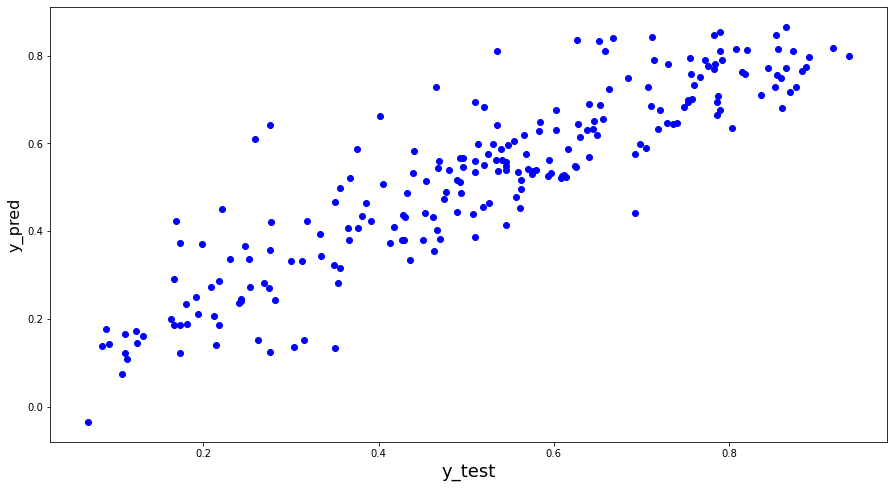

In [1228]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

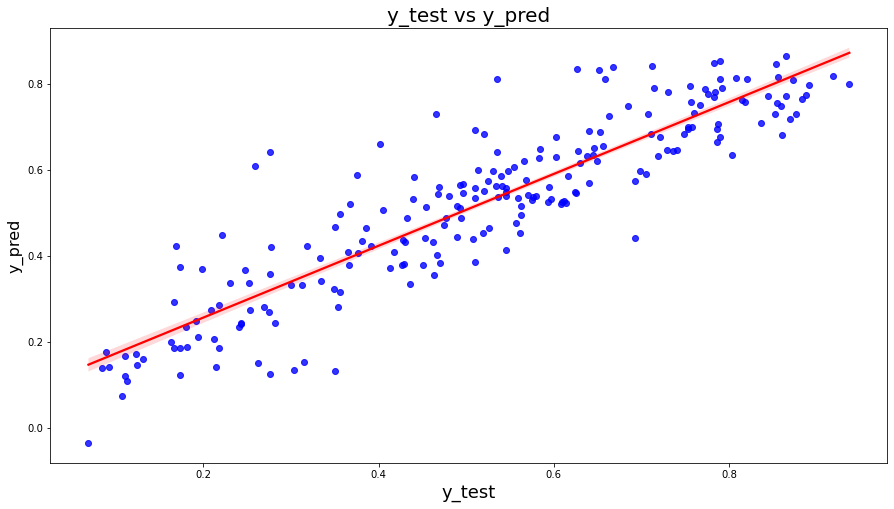

In [1229]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [1230]:
#Function to plot Actual vs Predicted

#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label
    
    


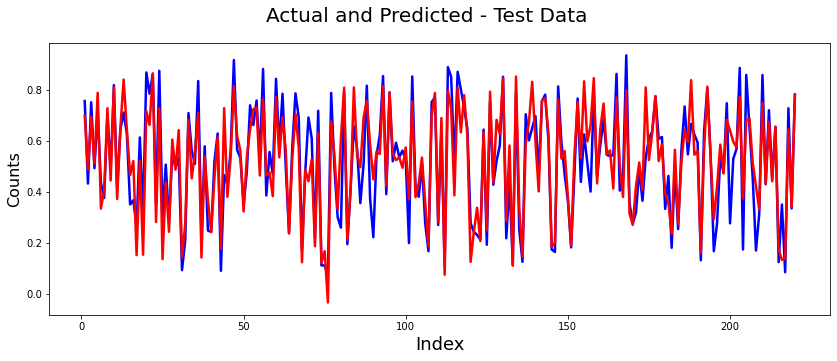

In [1231]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### We can see that the predictions on the Test data is quite close to the actual data

# 6. Checking the assumptions of Linear regression algorithm

## 6.a. Linear Relationship between the features and target
## 6.b. Homoscedasticity assumption

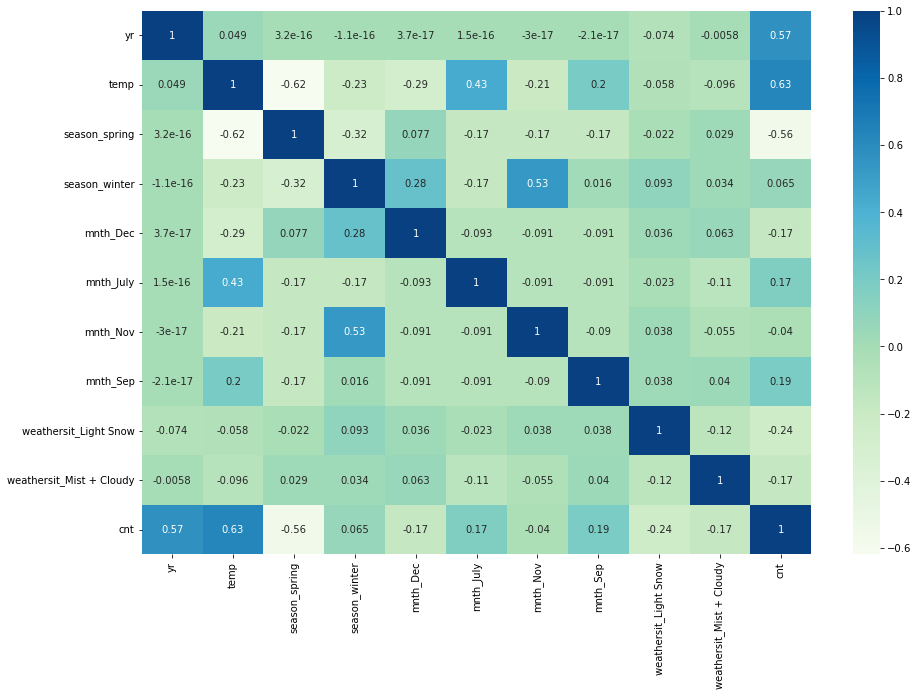

In [1259]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df[['yr','temp', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'cnt']].corr(), cmap='GnBu', annot=True)
plt.show()

### cnt (target variable) is linearly related with all the independent variables

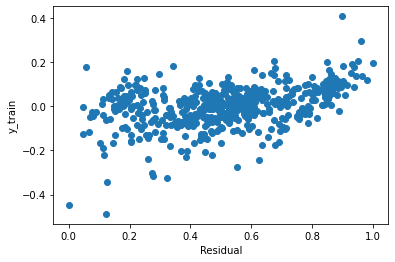

In [1240]:
# Linearity Check on Training dataset

# scatter plot for the check
residual_train = (y_train - y_train_pred)
plt.scatter(y_train,residual_train)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

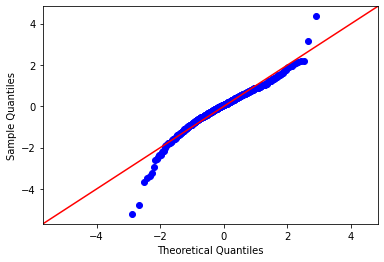

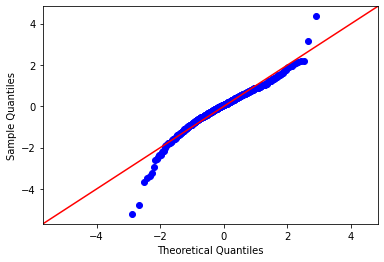

In [1242]:
sm.qqplot(residual_train,fit=True,line='45')

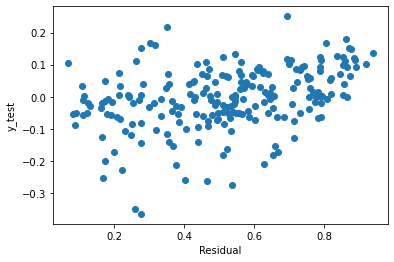

In [1243]:
# Linearity Check on Test dataset
# scatter plot for the check
residual_test = (y_test - y_test_pred)
plt.scatter(y_test,residual_test)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

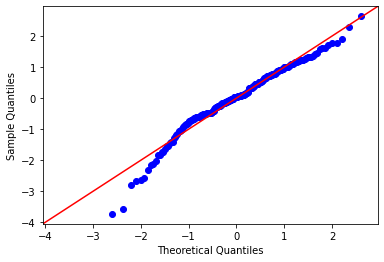

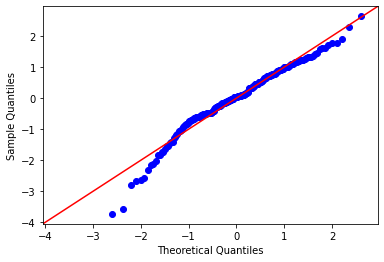

In [1244]:
sm.qqplot(residual_test,fit=True,line='45')

### Equally spread residuals around a horizontal line without distinct patterns are a good indication of having the linear relationships. Error terms are randomly distributed and are independent of one another. Thus, both Linearity and Homoscedasticity assumptions are getting satisfied.

### Normal Q-Q shows if residuals are normally distributed. It’s good if residuals are lined well on the straight dashed line.

## 6.b. Little or no Multicollinearity between the features

In [1245]:
#Drop the constant term B0

X_train_lm7 = X_train_lm6.drop(['const'], axis=1)

# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.90
3,season_winter,2.33
0,yr,2.02
6,mnth_Nov,1.61
9,weathersit_Mist + Cloudy,1.55
4,mnth_Dec,1.38
2,season_spring,1.37
5,mnth_July,1.35
7,mnth_Sep,1.21
8,weathersit_Light Snow,1.07


### VIF value for all the predictor variables is below 3 indicating there is no problem of multicollinearity

## 6.d. Error terms are normally distributed with mean zero


<Figure size 432x288 with 0 Axes>

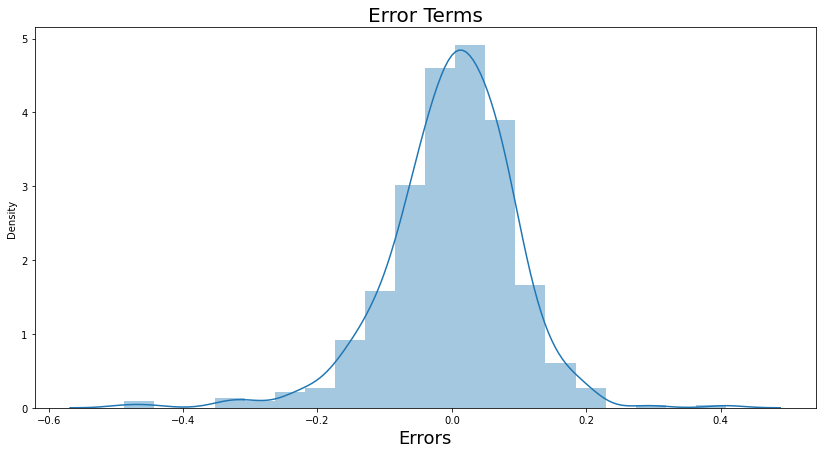

In [1248]:
# Plot the histogram of the error terms for Training dataset
res= y_train - y_train_pred

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((res), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

<Figure size 432x288 with 0 Axes>

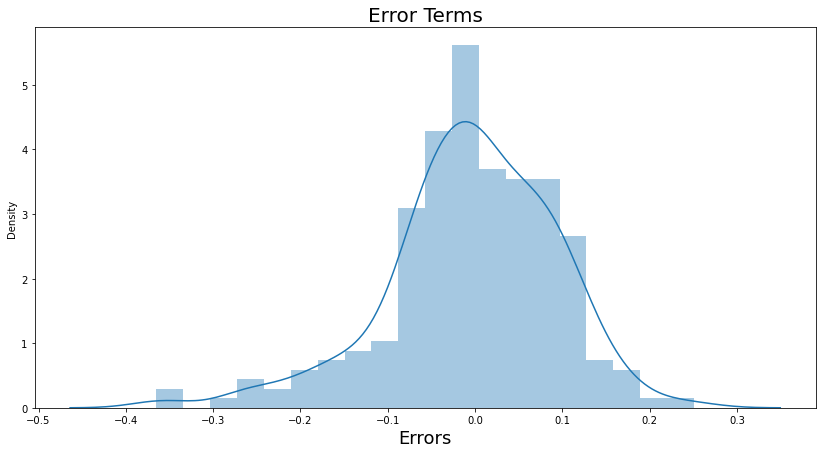

In [1249]:
# Plot the histogram of the error terms for Test dataset
res= y_test - y_test_pred

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((res), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

### Error terms are normally distributed with mean=0

## Linear Regression assumptions are satified, thus, model's results are reliable

# 7. Interpretation of the results

## Final model equation

## cnt= 0.2316 + (0.2366 * yr) + (0.4146 * temp) + (-0.1295 * season_spring) + (0.0915 * season_winter) +  (-0.0749 * mnth_Dec) +  (-0.0517 * mnth_July) + (-0.0634 * mnth_Nov) + (0.0523 * mnth_Sep) + (-0.3074 * weathersit_Light Snow) +  (-0.0827 * weathersit_Mist + Cloudy)



# Top 5 predictor variables that influence bike bookings are:
1. Temprature - A coefficient value of 0.4146 indicates that temprature has a significant impact on bike rentals
2. Weathersit (3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - A coefficient value of -0.3074 indicates that light snow and rainy conditions deter people from taking rental bikes
3. Year- A coefficient of 0.2366 indicates that year wise the bike rental numbers are increasing. An increase of 0.2366 units is recorded moving from 2018 to 2019 (with a unit increase in year).
4. Season_Spring: A coefficient of -0.1295 indicates that spring season negatively impacts the number of bike rentals
5. Season_winter: A coefficient of 0.0915 indicates that winter season positively impacts the number of bike rentals

# Business Interpretation
Keeping this in mind, BoomBikes can increase the bike availability and the promotions by using the combination of the following conditions:

1. Temprature is high
2. Weather is clear (Mist, clouds, snow, fog deters people from taking rented bikes)
3. Season is winter (atleast not spring as spring season has a negative coefficient)
4. Most favorable months is September
5. Least favorable months are July, November and December as they are signifacntly impacint the number of bike rentals negatively

All in all, Management can plan their promotions and advertising to entice maximum customers in the month of September, no need to give huge discounts in this period as the favorable weather and the season conditions will lure customers in definitely. We can try to sign up members for a long term membership in this time period though, by reducing the fee as that can capture the audience when they are availing the services and can generate a decent revenue to fall back on when the business is low. All the people who become members can also form a static userbase in the unfavorable times as well.

As to all the other months/time situations (when the pandemic situation clears up), focus on days when the weather appears clear/pleasant- During this, management can decide to roll out a nice promotional strategy offering discounts on bookings to get good number of bike rentals despite the adverse circumstances.